In [61]:
datasett<-read.csv('impacts.csv')
dataset<-datasett[,4:10]

The following dataset contains a public information about subset of known asteroids, collected by NASA and California Institute of Technology(CalTech). Dataset includes 11 variables from which the following 7 have been selected for analysis:

Possible Impacts: discrete numerical variable, it describes a number of times a given asteroid came close to colliding with Earth, sometimes regarded as Potential impacts, instead of Possible impacts

Cumulative impact Probability: continues numerical variable, it is obtained by summing impact probabilities of all detected potential impacts

Asteroid Velocity (relative to Earth): continues numerical variable, it assumes massless Earth, so that additional velocity due to Earth’s gravitational field can be disregarded

Magnitude: continues numerical variable, it is a measure of Asteroid’s brightness when asteroid is 1 astronomical units away from both the Sun, and the observer, and at full phase for the observer

Diameter: continues numerical variable (in km)

Cumulative Palermo Scale: Continues numerical variable which indicates Cumulative hazard rating according to the Palermo technical impact hazard scale, based on the tabulated impact date, impact probability and impact energy

Maximum Palermo Scale: Continues numerical variable which indicates Maximum hazard rating according to the Palermo technical impact hazard scale, based on the tabulated impact date, impact probability and impact energy


In [62]:
head(dataset)

Possible.Impacts,Cumulative.Impact.Probability,Asteroid.Velocity,Asteroid.Magnitude,Asteroid.Diameter..km.,Cumulative.Palermo.Scale,Maximum.Palermo.Scale
1,5.2e-09,17.77,28.3,0.007,-8.31,-8.31
23,7.6e-05,8.98,31.4,0.002,-6.60,-6.96
30,1.6e-05,18.33,31.4,0.002,-6.48,-6.87
24,2.0e-07,4.99,26.7,0.016,-6.83,-6.95
85,2.3e-08,19.46,19.2,0.497,-3.85,-4.30
55,2.8e-07,5.98,22.5,0.110,-5.03,-5.51


The dataset did not require any preprocessing for initial analysis since it did not contain any partially or fully missing entries. By graphing numerical feature density distributions individually, it became clear that features with the least to no amount of skew in distribution shape, that are most symmetric and resemble normal distributon most are cumulative palermo scale and maximum palermo scale:

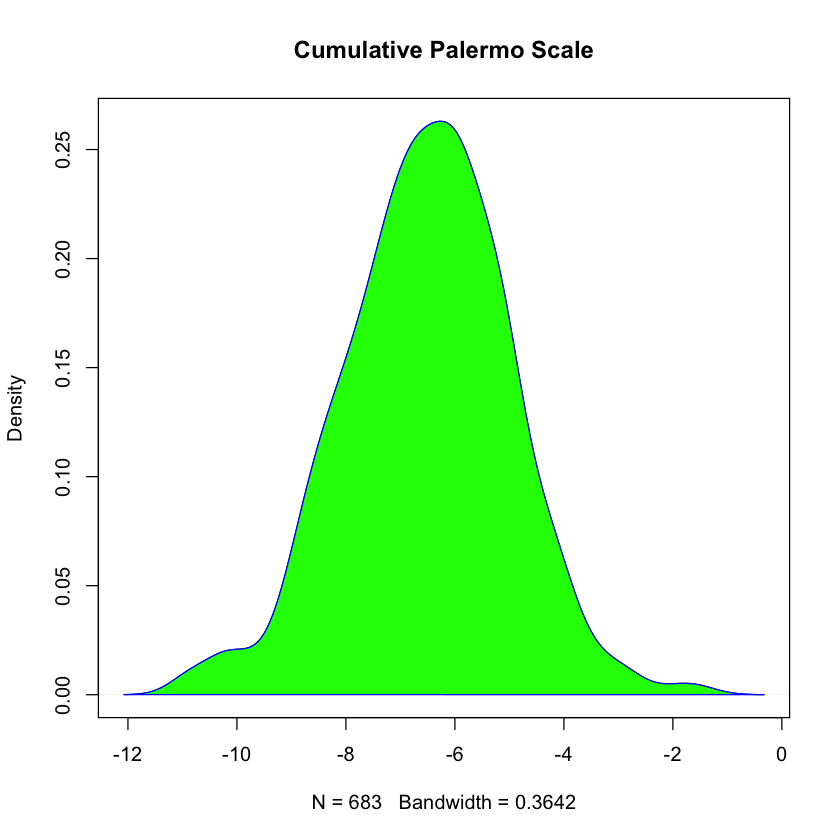

In [63]:
d<-density(dataset$Cumulative.Palermo.Scale)
plot(d, main="Cumulative Palermo Scale")
polygon(d, col="green", border="blue")

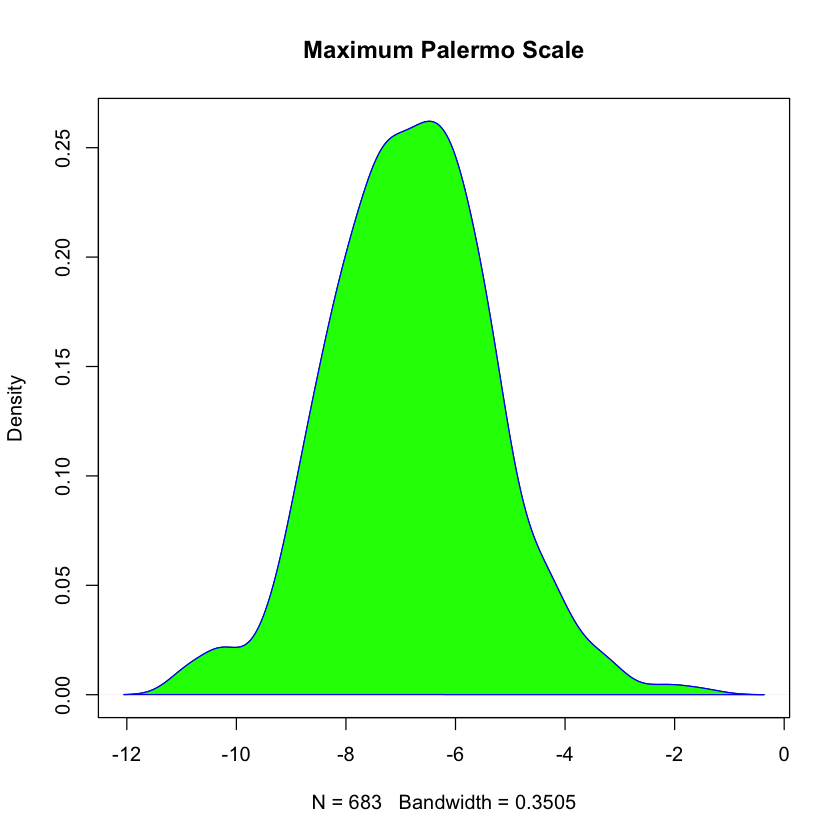

In [64]:
d<-density(dataset$Maximum.Palermo.Scale)
plot(d, main="Maximum Palermo Scale")
polygon(d, col="green", border="blue")

Asteroid velocity and Magnitude are close second, their density still resebles Gaussian distribution, however they do tend to introduce negative and positive skews respectively:

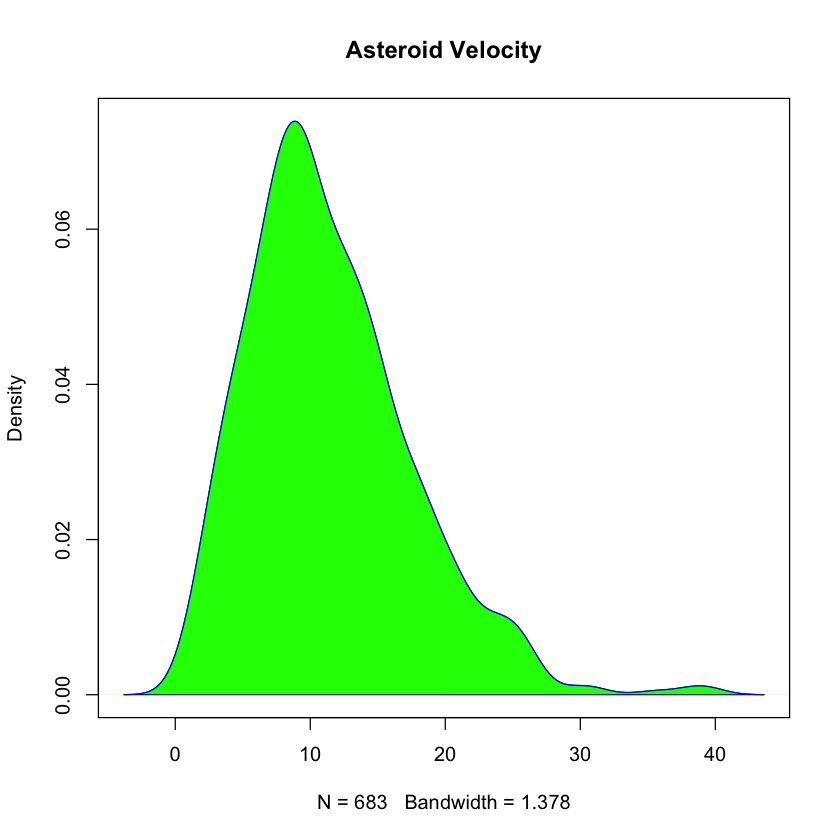

In [65]:
d<-density(dataset$Asteroid.Velocity)
plot(d, main="Asteroid Velocity")
polygon(d, col="green", border="blue")

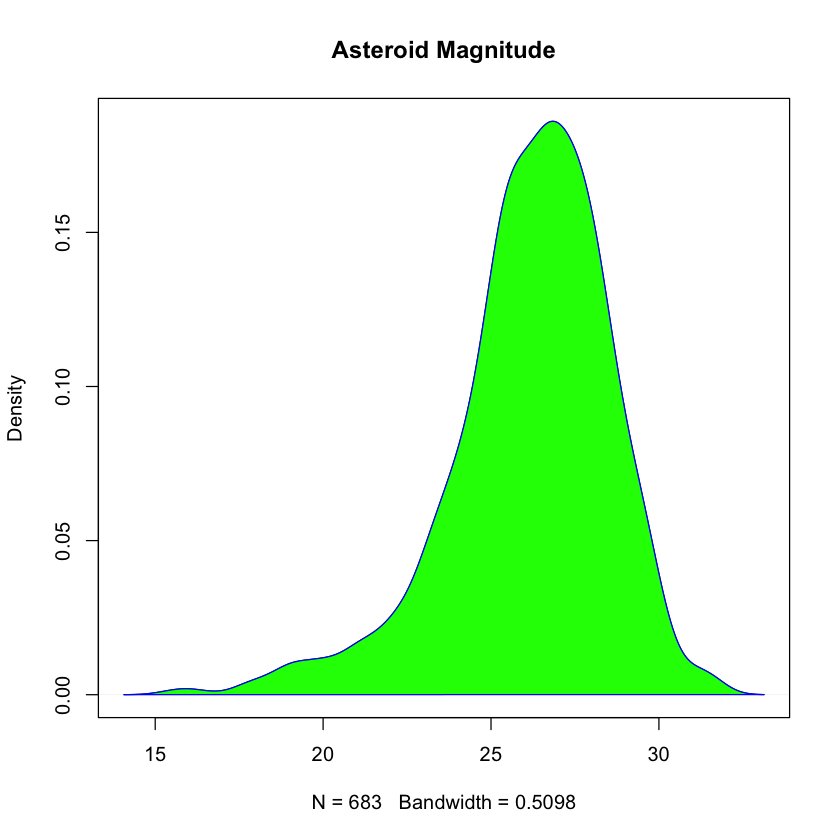

In [66]:
d<-density(dataset$Asteroid.Magnitude)
plot(d, main="Asteroid Magnitude")
polygon(d, col="green", border="blue")

feature with the most peculiar distribution shape is cumulative impact probability (summed impact probabilities of all detected potential impacts). it quite literally looks like Dirac delta function, wherein density of an idealized point mass is represented as a function equal to zero everywhere except for one point and whose integral over the entire real line is equal to one.

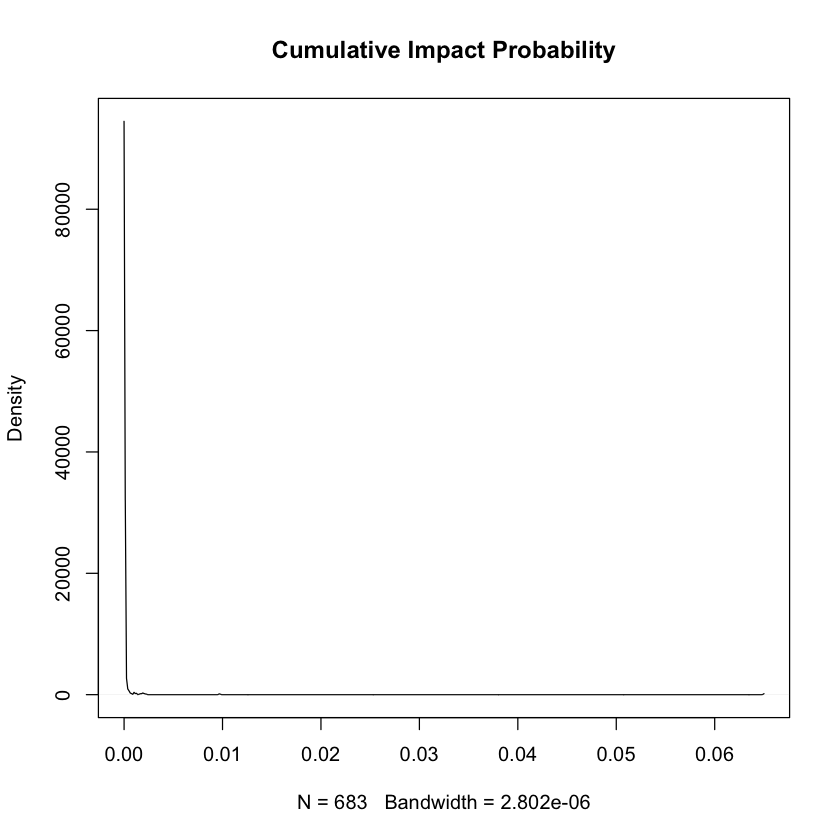

In [67]:
d<-density(dataset$Cumulative.Impact.Probability)
plot(d, main="Cumulative Impact Probability")

my first thought was that the reason behind it was the summation of probabilities, however this can not be right, there is no reason why probabilities of completely different events happening at different times and conditions should add up to vaugely the same number, so I double checked and as expected, they are not equal:

In [68]:
head(dataset$Cumulative.Impact.Probability)

[1] 5.2e-09 7.6e-05 1.6e-05 2.0e-07 2.3e-08 2.8e-07

it turned out that the problem was introduced by how R chooses scales on plots by default and if one changes it on x axis via introducing xlim parameter, distribution shape peculiarity is gone:

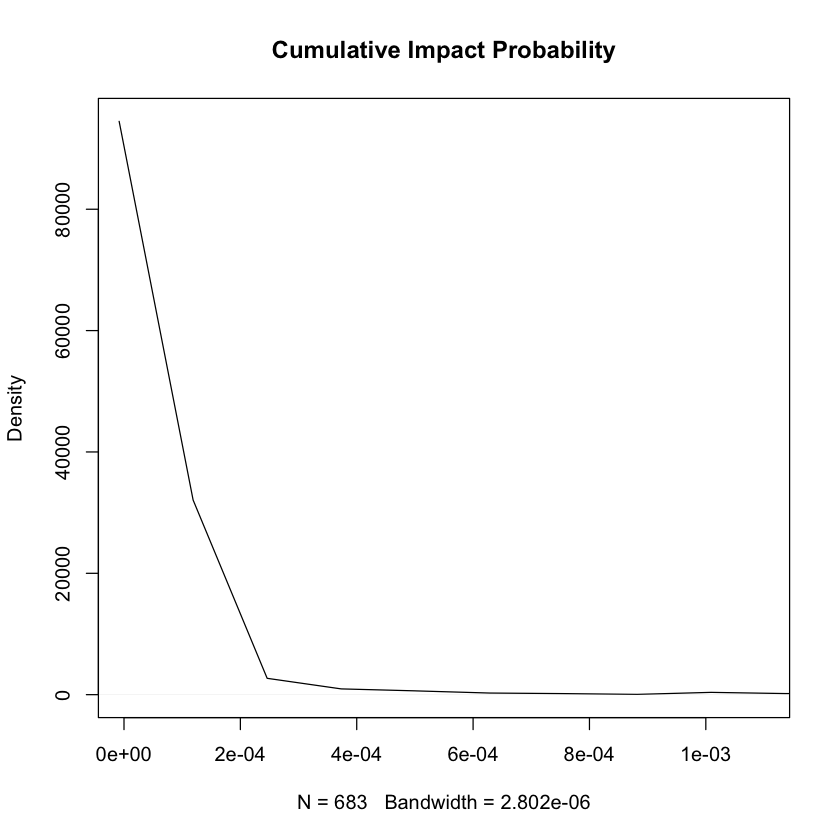

In [69]:
d<-density(dataset$Cumulative.Impact.Probability)
plot(d, xlim=c(1.1e-10,1.1e-3), main="Cumulative Impact Probability")

updated plot shows that most of the entries in cumulative impact probability column are values that are nearest to zero, which makes sense since at any given time it is more likely that any given asteroid has less chances of colliding with Earth, than otherwise

the rest two numeric variables in the dataset - Possible Impacts and Asteroid Diameter are highly assymetric, both of them have a positive skew:

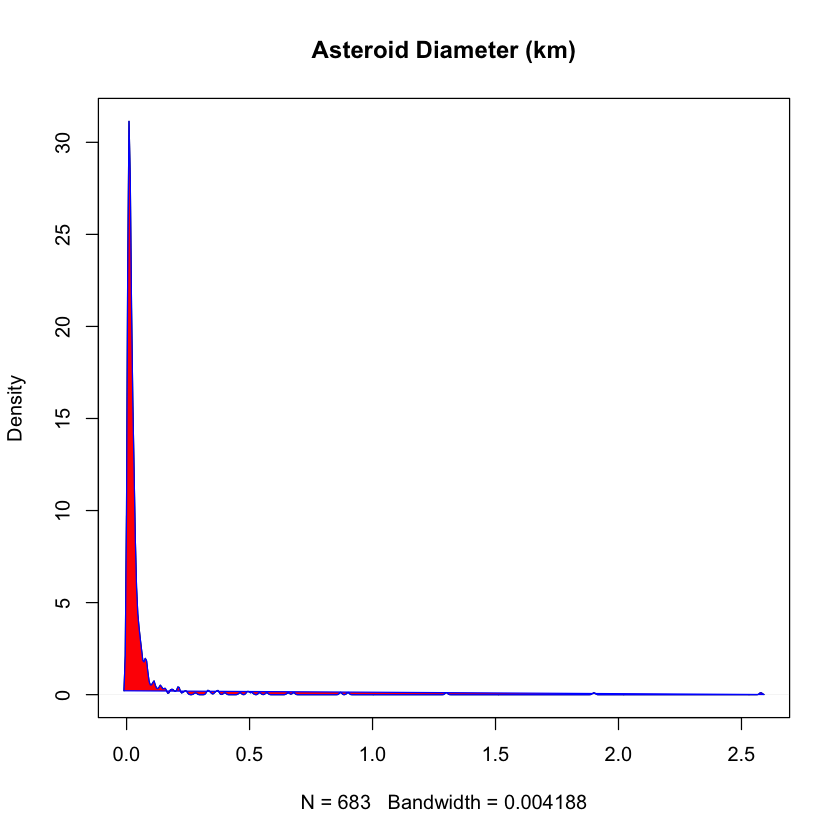

In [70]:
d<-density(dataset$Asteroid.Diameter..km.)
plot(d, main="Asteroid Diameter (km)")
polygon(d, col="red", border="blue")

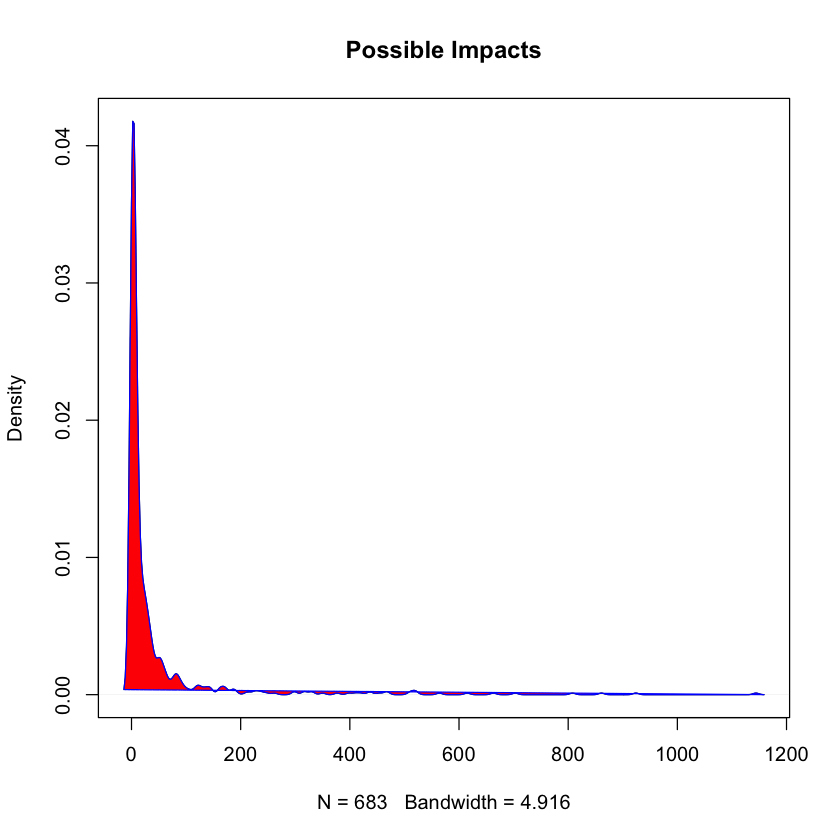

In [71]:
d<-density(dataset$Possible.Impacts)
plot(d, main="Possible Impacts")
polygon(d, col="red", border="blue")

To make sure that all the features truly are numerical before performing tests on it and calculating measures of central tendency and spread, outputting the internal structure would be a good idea:

In [72]:
str(dataset)

'data.frame':	683 obs. of  7 variables:
 $ Possible.Impacts             : int  1 23 30 24 85 55 123 514 350 187 ...
 $ Cumulative.Impact.Probability: num  5.2e-09 7.6e-05 1.6e-05 2.0e-07 2.3e-08 2.8e-07 9.0e-07 1.9e-06 1.8e-05 7.9e-08 ...
 $ Asteroid.Velocity            : num  17.77 8.98 18.33 4.99 19.46 ...
 $ Asteroid.Magnitude           : num  28.3 31.4 31.4 26.7 19.2 22.5 24.1 26.2 28.5 26.9 ...
 $ Asteroid.Diameter..km.       : num  0.007 0.002 0.002 0.016 0.497 0.11 0.052 0.02 0.007 0.014 ...
 $ Cumulative.Palermo.Scale     : num  -8.31 -6.6 -6.48 -6.83 -3.85 -5.03 -5.41 -5.91 -6.51 -7.18 ...
 $ Maximum.Palermo.Scale        : num  -8.31 -6.96 -6.87 -6.95 -4.3 -5.51 -6.42 -7.58 -7.54 -7.97 ...


measures of central tendency are expected to be within a close range to each other if the distribution is normal, which is precisely what we see in cumulative and maximum palermo scale central tendency measures, followed by asteroid velocity and magnitude where range gets larger:


In [73]:
summary(dataset)

 Possible.Impacts  Cumulative.Impact.Probability Asteroid.Velocity
 Min.   :   1.00   Min.   :0.00e+00              Min.   : 0.34    
 1st Qu.:   2.00   1st Qu.:1.10e-07              1st Qu.: 7.24    
 Median :   6.00   Median :1.70e-06              Median :10.50    
 Mean   :  43.35   Mean   :1.54e-04              Mean   :11.46    
 3rd Qu.:  29.00   3rd Qu.:1.55e-05              3rd Qu.:14.81    
 Max.   :1144.00   Max.   :6.50e-02              Max.   :39.47    
 Asteroid.Magnitude Asteroid.Diameter..km. Cumulative.Palermo.Scale
 Min.   :15.60      Min.   :0.00200        Min.   :-10.980         
 1st Qu.:25.00      1st Qu.:0.01000        1st Qu.: -7.490         
 Median :26.40      Median :0.01700        Median : -6.460         
 Mean   :26.16      Mean   :0.04938        Mean   : -6.512         
 3rd Qu.:27.80      3rd Qu.:0.03300        3rd Qu.: -5.490         
 Max.   :31.60      Max.   :2.57900        Max.   : -1.420         
 Maximum.Palermo.Scale
 Min.   :-11.000      
 1st Qu.:

the results confirm that in case of normal-like distributions such as cumulative and maximum palermo scales, mean and median are within a short range to each other (-6.4 and -6.5) in case of Cumulative palermo, and (10.5/11.4) in case of maximum palermo. but if we take a look at variables with more assymetric and skewed distributions such as possible impacts and asteroid diameter, the range between median and mean gets broader: 6.00/43.35 in case of impacts and 0.017/0.049 in case of diameter.

the difference becomes even more apparent if we add lines for the central tendency measures in density distribution plots and observe the range betweem them get larger as distibutions become less symmetric:

In [74]:
getmode <- function(m) {
  uniqv <- unique(m)
  uniqv[which.max(tabulate(match(m, uniqv)))]
}

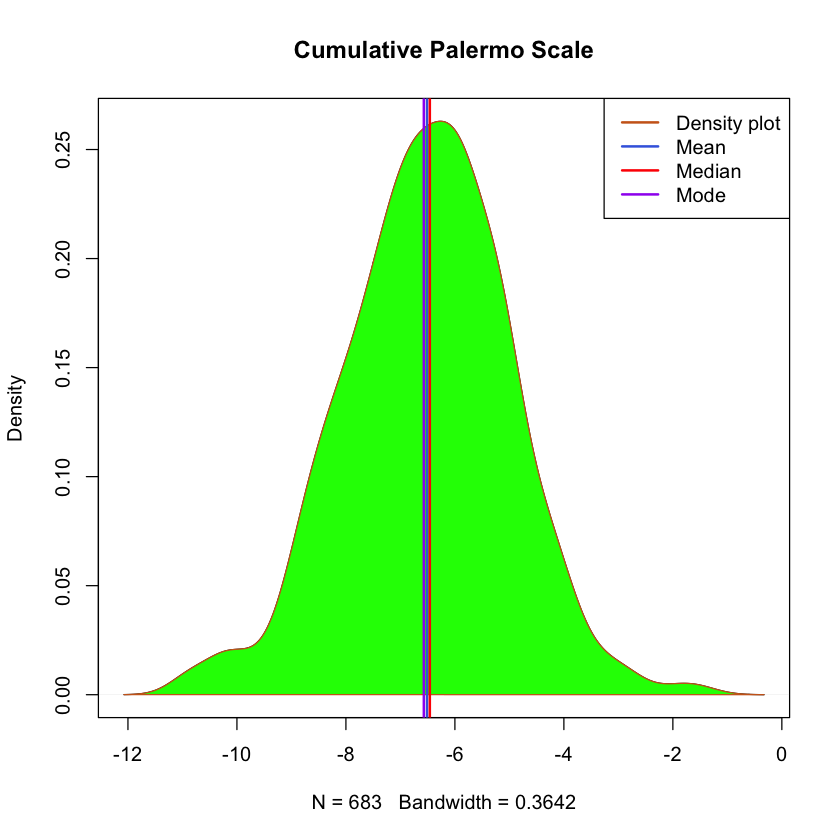

In [75]:
d<-density(dataset$Cumulative.Palermo.Scale)
plot(d, main="Cumulative Palermo Scale")
polygon(d, col="green", border="chocolate3")
abline(v = mean(dataset$Cumulative.Palermo.Scale),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Cumulative.Palermo.Scale),
       col = "red",
       lwd = 2)
abline(v = getmode(dataset$Cumulative.Palermo.Scale),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

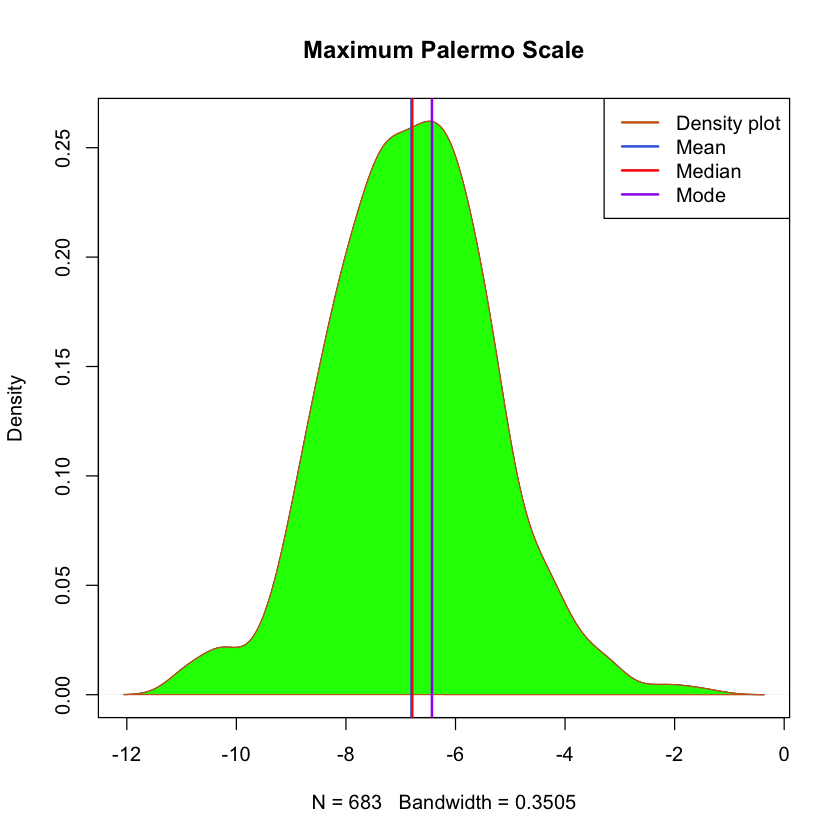

In [76]:
d<-density(dataset$Maximum.Palermo.Scale)
plot(d, main="Maximum Palermo Scale")
polygon(d, col="green", border="chocolate3")
abline(v = mean(dataset$Maximum.Palermo.Scale),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Maximum.Palermo.Scale),
       col = "red",
       lwd = 2)
abline(v = getmode(dataset$Maximum.Palermo.Scale),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

we can see that since distribution is highly symmetric, mean and median nearly overlap, however, if we now take a look at less evenly distributed variables we can observe these lines shift apart:

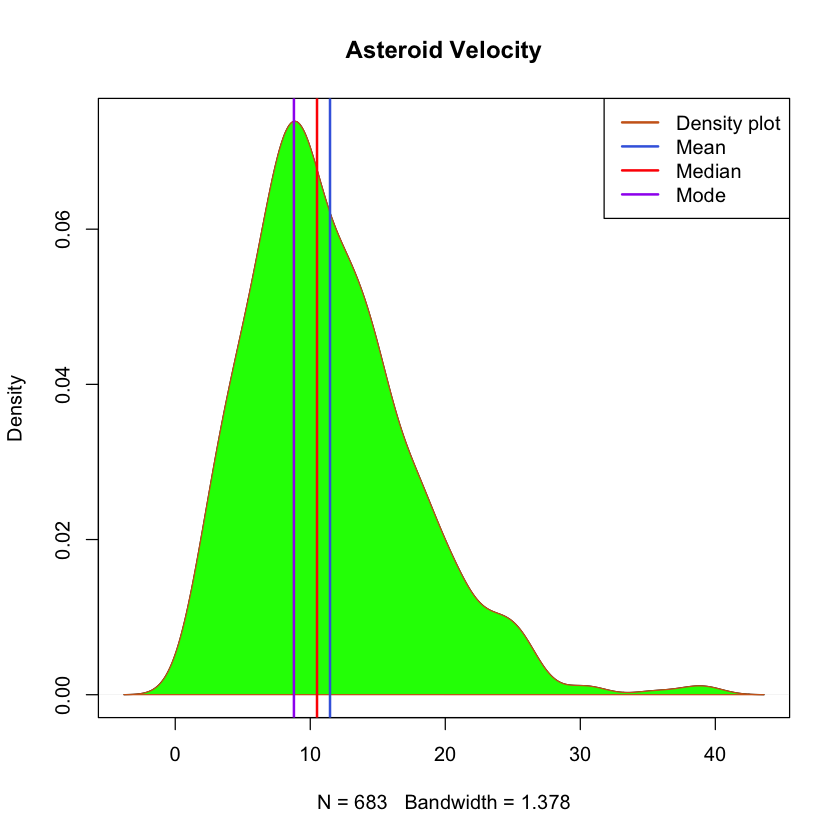

In [77]:
d<-density(dataset$Asteroid.Velocity)
plot(d, main="Asteroid Velocity")
polygon(d, col="green", border="chocolate3")
abline(v = mean(dataset$Asteroid.Velocity),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Asteroid.Velocity),
       col = "red",
       lwd = 2)
abline(v = getmode(dataset$Asteroid.Velocity),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

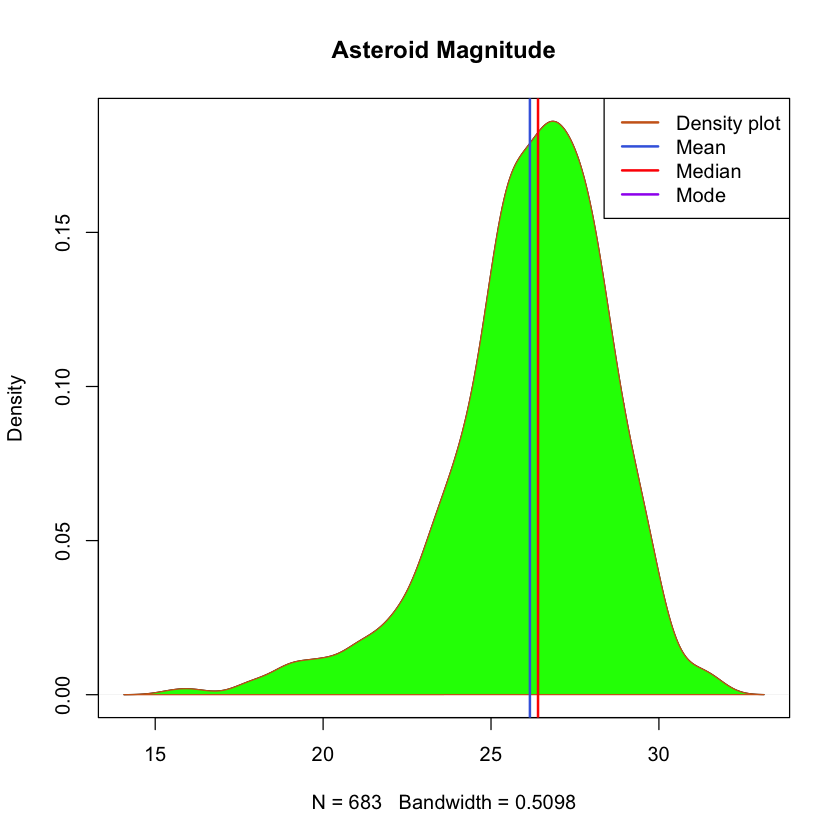

In [78]:
d<-density(dataset$Asteroid.Magnitude)
plot(d, main="Asteroid Magnitude")
polygon(d, col="green", border="chocolate3")
abline(v = mean(dataset$Asteroid.Magnitude),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Asteroid.Magnitude),
       col = "red",
       lwd = 2)
abline(v = getmode(dataset$Asteroid.Velocity),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

the difference is even more apparent in highly skewed distributions:

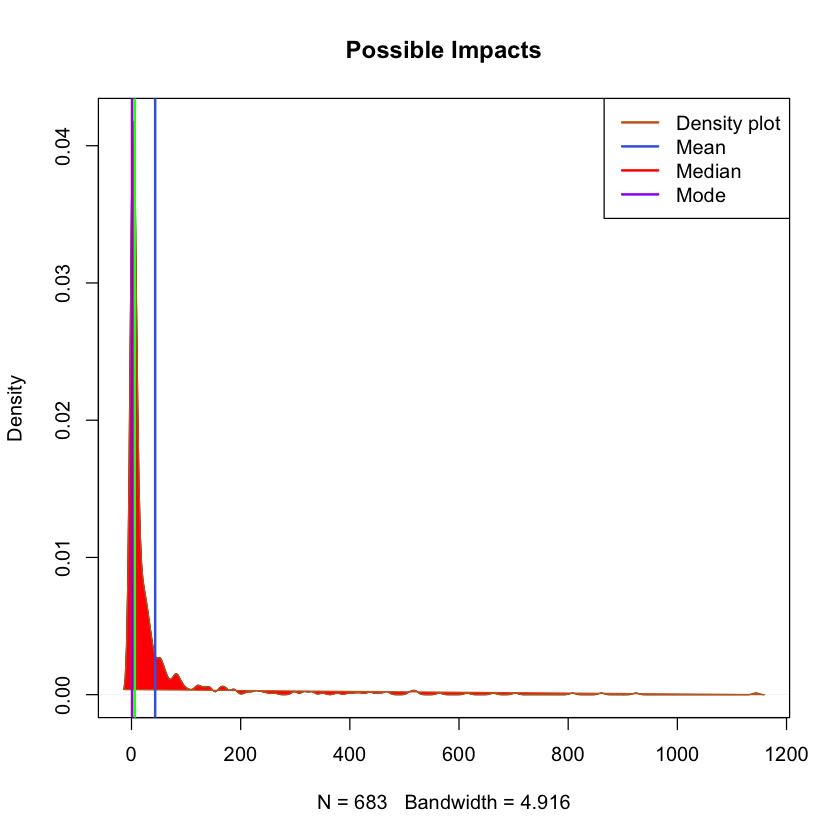

In [79]:
d<-density(dataset$Possible.Impacts)
plot(d, main="Possible Impacts")
polygon(d, col="red", border="chocolate3")
abline(v = mean(dataset$Possible.Impacts),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Possible.Impacts),
       col = "green",
       lwd = 2)
abline(v = getmode(dataset$Possible.Impacts),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

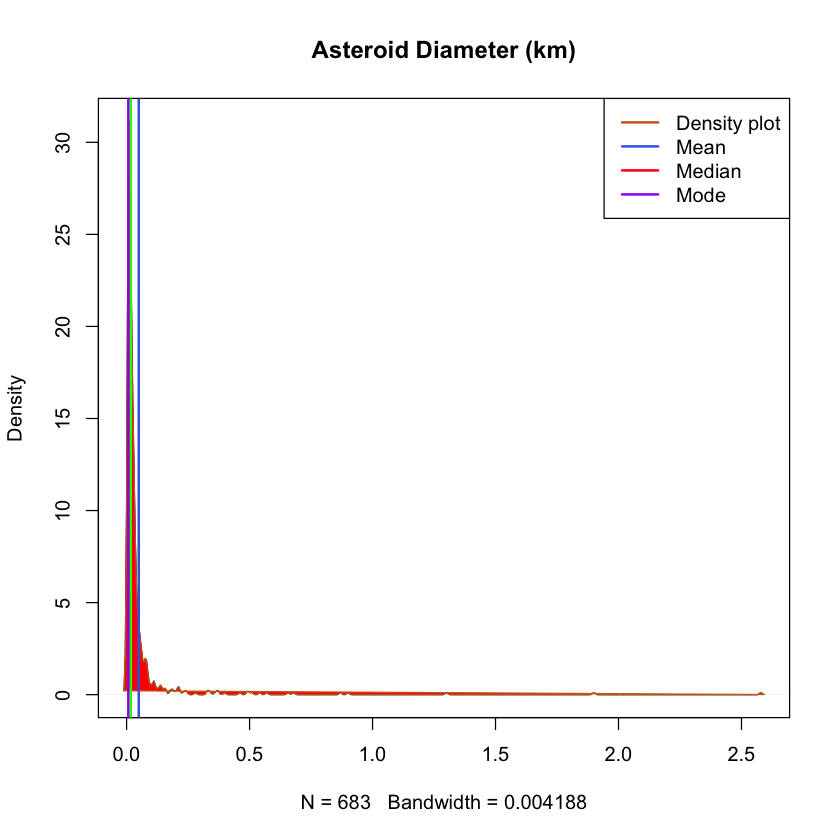

In [80]:
d<-density(dataset$Asteroid.Diameter..km.)
plot(d, main="Asteroid Diameter (km)")
polygon(d, col="red", border="chocolate3")
abline(v = mean(dataset$Asteroid.Diameter..km.),
       col = "royalblue",
       lwd = 2)
abline(v = median(dataset$Asteroid.Diameter..km.),
       col = "green",
       lwd = 2)
abline(v = getmode(dataset$Asteroid.Diameter..km.),
       col = "purple",
       lwd = 2)
legend(x = "topright",
       c("Density plot", "Mean", "Median", "Mode"),
       col = c("chocolate3", "royalblue", "red", "purple"),
       lwd = c(2, 2, 2, 2))

let us now take a look at measures of variability. since all the variables in our datset are in different units, range and interquartile range will not be of much assistance, but just for the sake of curiosity:

In [81]:
print("H-Spread, InterQuartile Range per variable:")
intq <- lapply(dataset, IQR)
intq

print("min value/max value per variable:")
rng <- lapply(dataset, range)
rng

[1] "H-Spread, InterQuartile Range per variable:"


$Possible.Impacts
[1] 27

$Cumulative.Impact.Probability
[1] 1.539e-05

$Asteroid.Velocity
[1] 7.57

$Asteroid.Magnitude
[1] 2.8

$Asteroid.Diameter..km.
[1] 0.023

$Cumulative.Palermo.Scale
[1] 2

$Maximum.Palermo.Scale
[1] 1.925

[1] "min value/max value per variable:"


$Possible.Impacts
[1]    1 1144

$Cumulative.Impact.Probability
[1] 1.1e-10 6.5e-02

$Asteroid.Velocity
[1]  0.34 39.47

$Asteroid.Magnitude
[1] 15.6 31.6

$Asteroid.Diameter..km.
[1] 0.002 2.579

$Cumulative.Palermo.Scale
[1] -10.98  -1.42

$Maximum.Palermo.Scale
[1] -11.00  -1.42

variance and standard deviation, on the other hand are metrics that do not care about units, they tell us how close the values of the distribution are to the mean (i.e midde)and provide us with a good overview of how much spread out our data is.

at first, let us take a look at numeric calculations:

In [82]:
print("variance of each variable:")
vrc <- lapply(dataset, var)
vrc

[1] "variance of each variable:"


$Possible.Impacts
[1] 12944.36

$Cumulative.Impact.Probability
[1] 6.34842e-06

$Asteroid.Velocity
[1] 36.81786

$Asteroid.Magnitude
[1] 5.70396

$Asteroid.Diameter..km.
[1] 0.02446183

$Cumulative.Palermo.Scale
[1] 2.277652

$Maximum.Palermo.Scale
[1] 2.178974

as expected, variance of more symmetrically distibuted variables like palermos and asteroid magnitude are fare less than variance of highly skewed distributions, such as "possible impacts" this obervation can also be confirmed visually:

(taking 3 variables with decreasing symmetry in their distribution, which causes variance to increase)

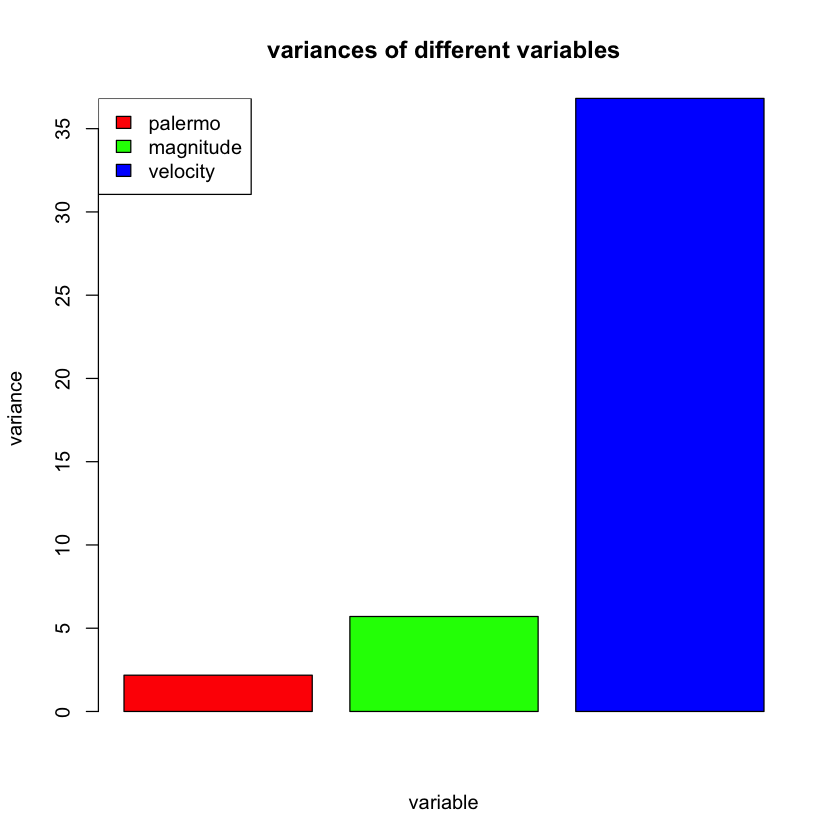

In [83]:
variances <- c(var(dataset$Maximum.Palermo.Scale), var(dataset$Asteroid.Magnitude),
               var(dataset$Asteroid.Velocity))
barplot(variances,
        main = "variances of different variables",
        xlab = "variable",
        ylab = "variance",
        col = c("red","green", "blue"))
legend("topleft",
       c("palermo","magnitude", "velocity"),
       fill = c("red","green", "blue")
)

although less noticeable because standard deviation is esentially a square root of variance, the connection between symmetricity of distribution and spread is still present:

In [84]:
print("standard deviation of each variable:")
sds <- lapply(dataset, sd)
sds

[1] "standard deviation of each variable:"


$Possible.Impacts
[1] 113.7733

$Cumulative.Impact.Probability
[1] 0.002519607

$Asteroid.Velocity
[1] 6.067772

$Asteroid.Magnitude
[1] 2.388296

$Asteroid.Diameter..km.
[1] 0.1564028

$Cumulative.Palermo.Scale
[1] 1.509189

$Maximum.Palermo.Scale
[1] 1.476135

comparing standard deviations of 3 variables with decreasing measure of symmetricity in their distribution:

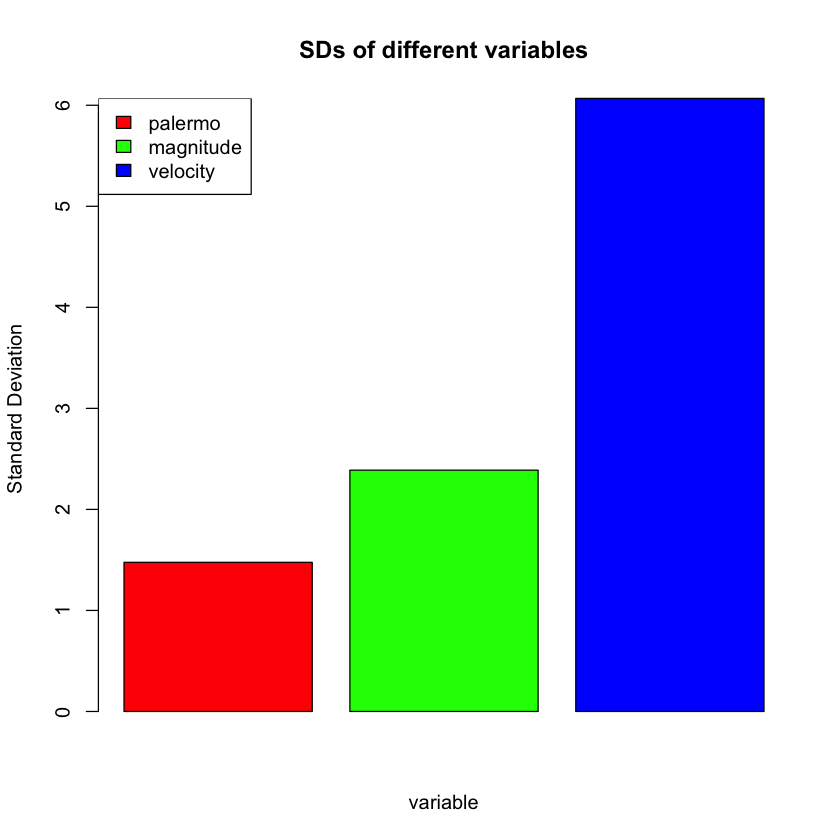

In [85]:
sdvs <- c(sd(dataset$Maximum.Palermo.Scale), sd(dataset$Asteroid.Magnitude),
               sd(dataset$Asteroid.Velocity))
barplot(sdvs,
        main = "SDs of different variables",
        xlab = "variable",
        ylab = "Standard Deviation",
        col = c("red","green", "blue"))
legend("topleft",
       c("palermo","magnitude", "velocity"),
       fill = c("red","green", "blue")
        )

you may have noticed that variable asteroid diameter, although its' distribution is highly skewed, has lower variance and standard deviation than some of the more symmetrically distributed variables such as palermos. this is due tue the fact that although skewness and distribution shape are related, skewness is also affected by other factors and it can actually be quantified via Pearson's measure:

In [86]:
getskew <- function(x){
  3*(mean(x)-median(x))/sd(x)
}

getskew(dataset$Asteroid.Diameter..km.)

[1] 0.6210454

let's also compare "skewness" of other variable distributions:

In [87]:
print("Measure of how skewed distribution is")
sk <- lapply(dataset, getskew)
sk

[1] "Measure of how skewed distribution is"


$Possible.Impacts
[1] 0.9848128

$Cumulative.Impact.Probability
[1] 0.1812754

$Asteroid.Velocity
[1] 0.4759128

$Asteroid.Magnitude
[1] -0.3036403

$Asteroid.Diameter..km.
[1] 0.6210454

$Cumulative.Palermo.Scale
[1] -0.1024762

$Maximum.Palermo.Scale
[1] -0.02847649

let us also define a function that loops through dataset and calculates kurtoses of shape of distribution of every single variable:

In [88]:
kurt <- function(x){
  
  j=0
  for (z in x) {
    j=j+( ((z-mean(x))^4)/length(x) )
  }
  j=j/(sd(x)^4)-3
  return (j)
}

print("kurtosis of different distributions:")

krt <- lapply(dataset, kurt)
krt

[1] "kurtosis of different distributions:"


$Possible.Impacts
[1] 30.56123

$Cumulative.Impact.Probability
[1] 639.6691

$Asteroid.Velocity
[1] 1.555401

$Asteroid.Magnitude
[1] 1.607685

$Asteroid.Diameter..km.
[1] 135.869

$Cumulative.Palermo.Scale
[1] 0.3252046

$Maximum.Palermo.Scale
[1] 0.431598

note that there is not just one single way of making this calculation, equations vary based on your assumptions, so just in case let's also try it another way:

In [89]:
kurt2 <- function(x){
  k = 0
  for (z in x) {
    k=k+((z-mean(x))^4)/(sd(x)^4)
  }
  return (k-3)
}
print("kurtosis of different distributions way 2:")

krt <- lapply(dataset, kurt2)
krt

[1] "kurtosis of different distributions way 2:"


$Possible.Impacts
[1] 22919.32

$Cumulative.Impact.Probability
[1] 438940

$Asteroid.Velocity
[1] 3108.339

$Asteroid.Magnitude
[1] 3144.049

$Asteroid.Diameter..km.
[1] 94844.55

$Cumulative.Palermo.Scale
[1] 2268.115

$Maximum.Palermo.Scale
[1] 2340.781

before we determine correlation coefficients, let's plot each variable as a function of every other variable to see visually whether correlation is linear, exponential, hyperbolic ot something entirely different, also check for heteroscedasticity etc

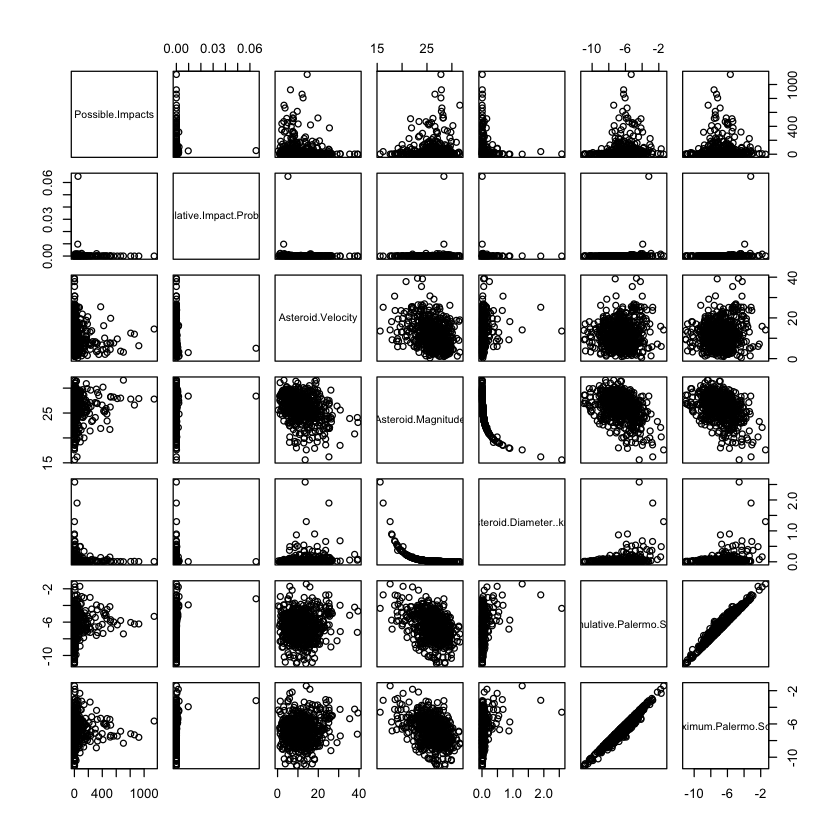

In [90]:
plot(dataset)

since our dataset tends to show heteroscedasticity, let's try to calculate correlation of each variable to every other variable using Spearman's method:

In [91]:
data.cor = cor(dataset, method = "spearman")
data.cor

,Possible.Impacts,Cumulative.Impact.Probability,Asteroid.Velocity,Asteroid.Magnitude,Asteroid.Diameter..km.,Cumulative.Palermo.Scale,Maximum.Palermo.Scale
Possible.Impacts,1.0000000,0.5064734,-0.28256416,0.1579999,-0.1563127,0.45632533,0.29530893
Cumulative.Impact.Probability,0.5064734,1.0000000,-0.33226846,0.3954028,-0.3940284,0.63515709,0.59874906
Asteroid.Velocity,-0.2825642,-0.3322685,1.00000000,-0.3137400,0.3097697,0.02652303,0.07123388
Asteroid.Magnitude,0.1579999,0.3954028,-0.31374000,1.0000000,-0.9994273,-0.35346874,-0.37620262
Asteroid.Diameter..km.,-0.1563127,-0.3940284,0.30976968,-0.9994273,1.0000000,0.35504358,0.37704141
Cumulative.Palermo.Scale,0.4563253,0.6351571,0.02652303,-0.3534687,0.3550436,1.00000000,0.97300459
Maximum.Palermo.Scale,0.2953089,0.5987491,0.07123388,-0.3762026,0.3770414,0.97300459,1.00000000


correlation matrix is quite diverse, we see both positive and negative correlations and diffenret correlation strengths ranging from very weak, to very strong (>0.9)

it is better to represent correlation matrix visually, preferably with heat map, so let's do it two different ways:

In [92]:
#install.packages("corrplot")
library(corrplot)

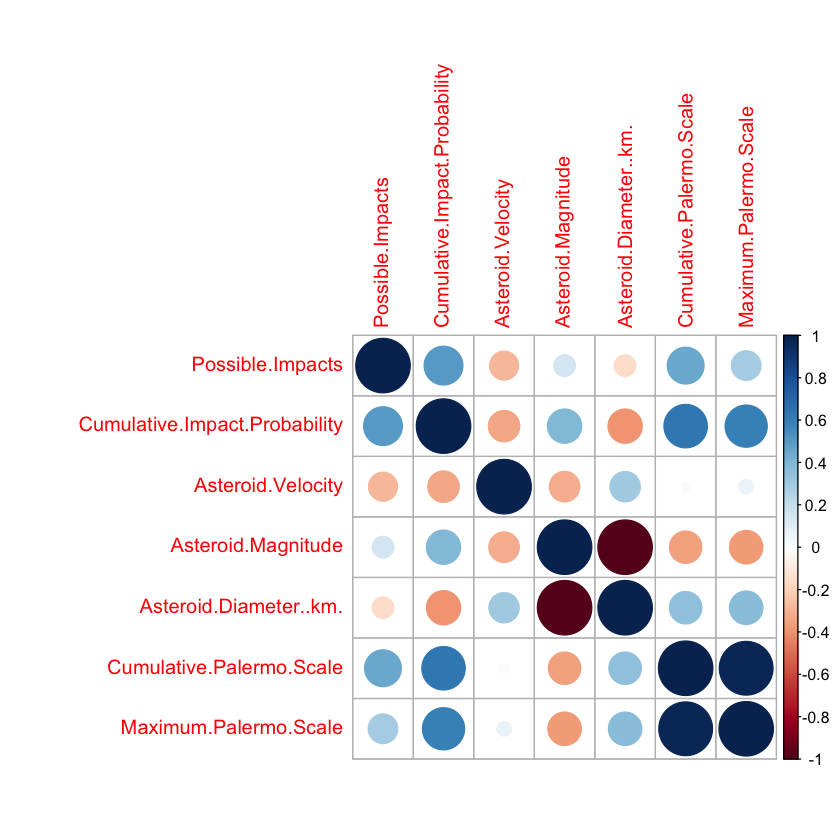

In [93]:
corrplot(data.cor)

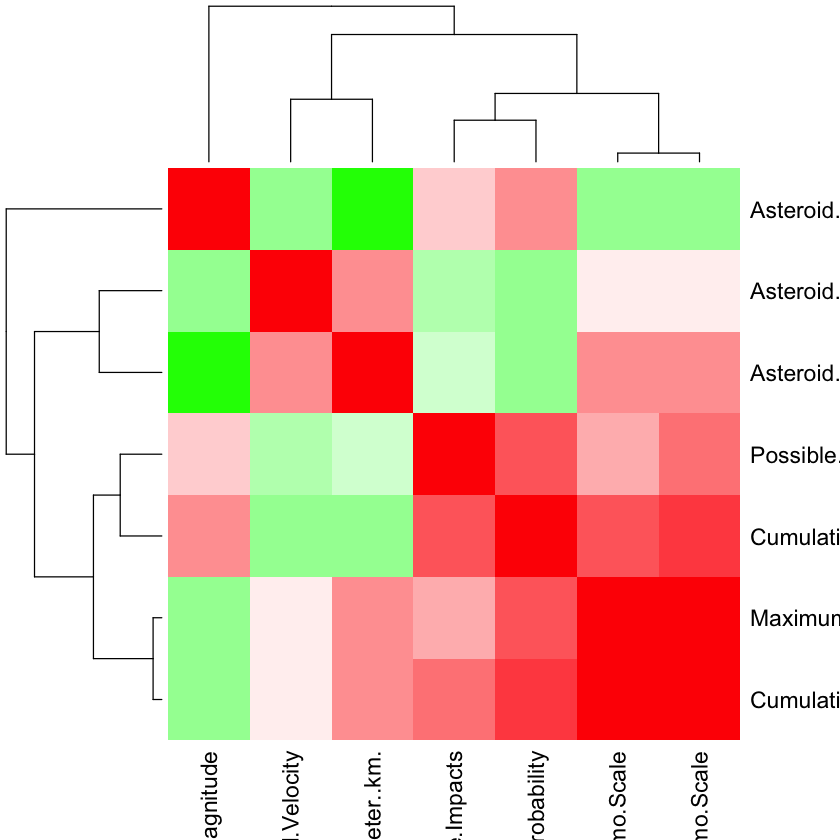

In [94]:
# second way
palette = colorRampPalette(c("green", "white", "red")) (20)
heatmap(x = data.cor, col = palette, symm = TRUE)

from the correlation matrix, as well as it's plots, few variables stand out by the strength of correlation between them: cumulative palermo-maximum palermo, and both palermos against cumulative impact probability.

palermo is a logarithmic scale, so palermo-palermo plot is as close to be perfectly linear as it gets, correlation strength is also quite high, however using it for regression would not be as interesting and insightful as palermo-impact probability, one can certainly do it, but it would be much like trying to determine by how much sum of salaries would change if one increased each salary by a certain value.

so instead, let us choose cumulative impact probability as our independent variable and cumulative palermo as dependent variable. at first, let's see how their plot looks and then try to remove outliers:

at first, let's plot all the variables that have high to medium correlation strength with our dependent variable - cumulative palermo scale:

first one is cumulative palermo against maximum palermo. as I have mentioned, palermo values are calulated on logarithmic scale, which explains why the following plot looks almost perfectly linear:

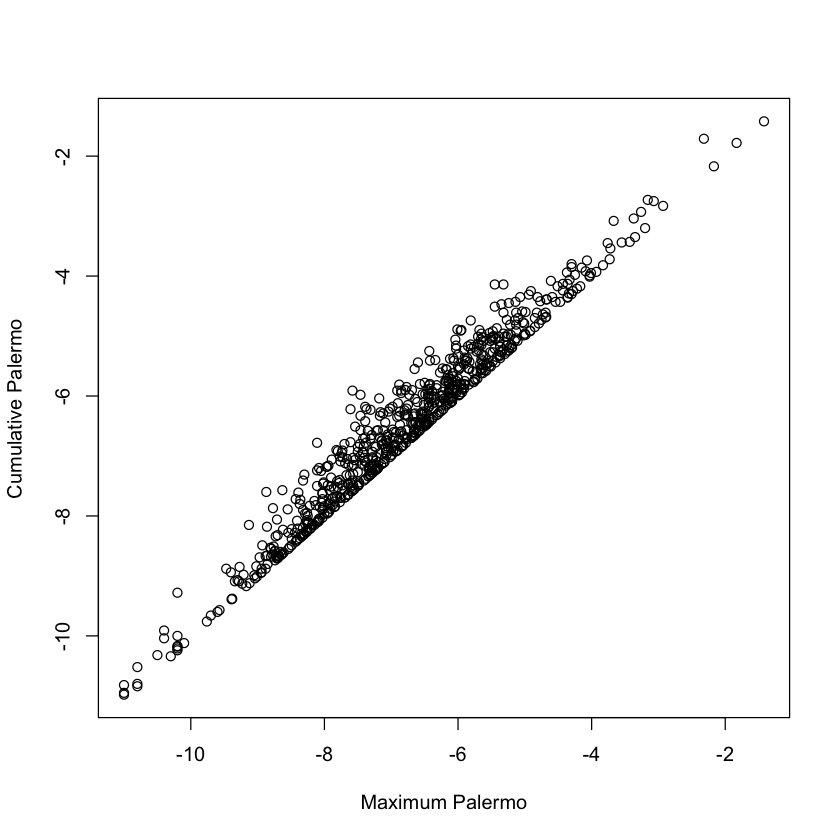

In [95]:
plot(dataset$Maximum.Palermo.Scale, dataset$Cumulative.Palermo.Scale,
     xlab="Maximum Palermo", ylab="Cumulative Palermo")

2: cumulative palermo - impact probability (still linear, but has more outliers that we will have to remove before creating regression model)

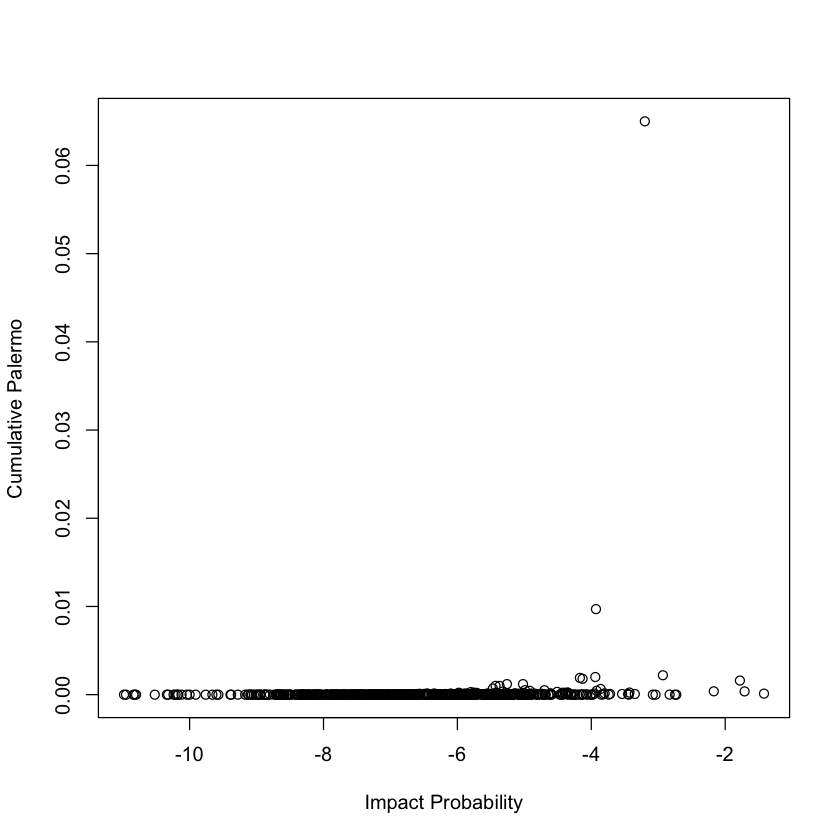

In [96]:
plot(dataset$Cumulative.Palermo.Scale, dataset$Cumulative.Impact.Probability,
     xlab="Impact Probability", ylab="Cumulative Palermo")

last two independent variables are possible impacts and Asteroid Diameter, the relationship is linear, but correlation strength is quite weak:

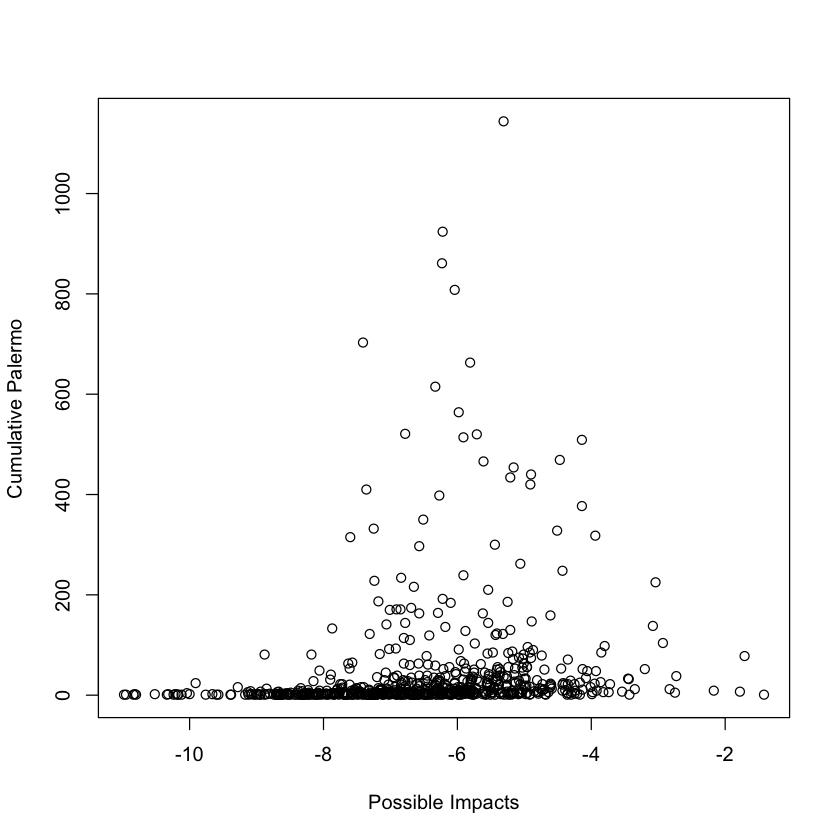

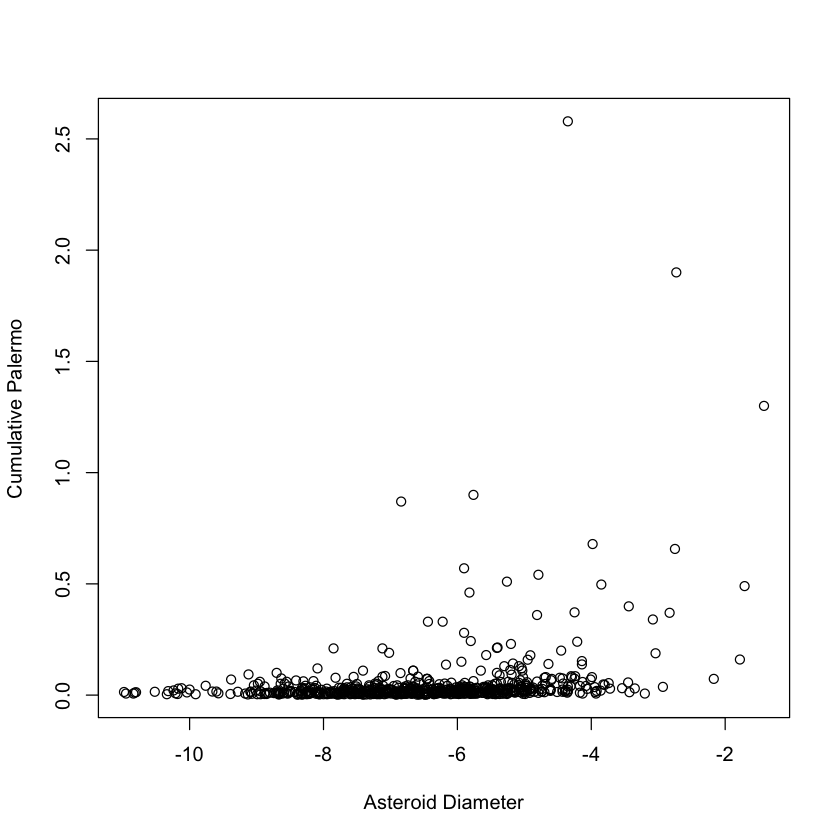

In [97]:
plot(dataset$Cumulative.Palermo.Scale, dataset$Possible.Impacts,
     xlab="Possible Impacts", ylab="Cumulative Palermo")
plot(dataset$Cumulative.Palermo.Scale, dataset$Asteroid.Diameter..km.,
     xlab="Asteroid Diameter", ylab="Cumulative Palermo")

before creating linear model,let's preprocess independent and dependent variable vectors by removing outliers

In [98]:
# gets the outliers and substracts their entire row from the copy of a dataset, from now on, dataframe is x

outliers <- boxplot(dataset$Cumulative.Palermo.Scale, plot=FALSE)$out
x<-dataset
x<- x[-which(x$Cumulative.Palermo.Scale %in% outliers),]

outliers1 <- boxplot(x$Cumulative.Impact.Probability, plot=FALSE)$out
x<- x[-which(x$Cumulative.Impact.Probability %in% outliers1),]

# we can verify that this worked by comparing the number of entires in initial and final dataframe
print("initial dataframe entry count:")
dim(dataset)
print("processed dataframe entry count:")
dim(x)

[1] "initial dataframe entry count:"


[1] 683   7

[1] "processed dataframe entry count:"


[1] 559   7

let's now plot the processed features with and without outliers

[1] "original, with outliers"
[1] "cleaned, without outliers"


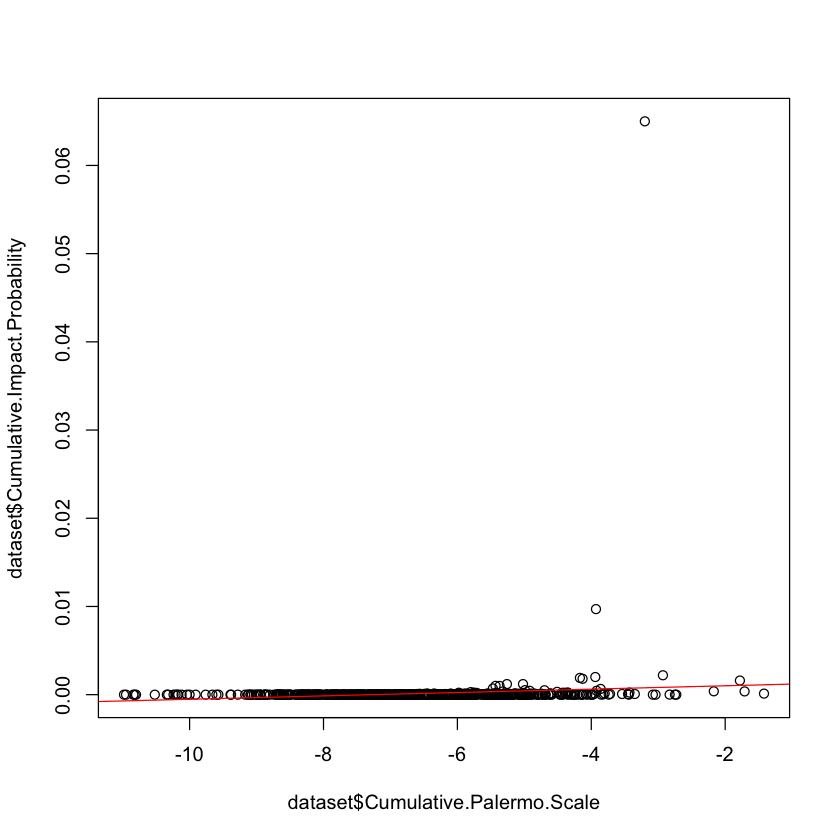

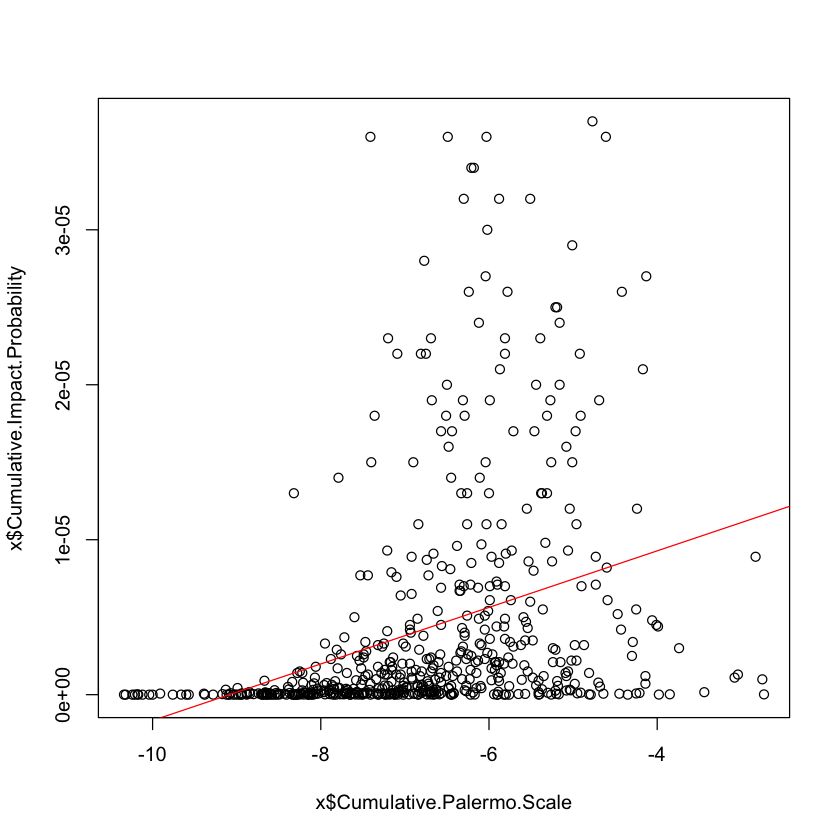

In [99]:
print("original, with outliers")

plot(dataset$Cumulative.Palermo.Scale, dataset$Cumulative.Impact.Probability)
abline(lm(dataset$Cumulative.Impact.Probability~dataset$Cumulative.Palermo.Scale), col="red")


print("cleaned, without outliers")

plot(x$Cumulative.Palermo.Scale, x$Cumulative.Impact.Probability)
abline(lm(x$Cumulative.Impact.Probability~x$Cumulative.Palermo.Scale), col="red")

In [100]:
# create linear model with cleaned data

y<-x$Cumulative.Palermo.Scale
xx<-x$Cumulative.Impact.Probability
lmMod <- lm (y ~ xx)
lmMod

summary(lmMod)


Call:
lm(formula = y ~ xx)

Coefficients:
(Intercept)           xx  
     -7.028    62070.995  



Call:
lm(formula = y ~ xx)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3120 -0.8554 -0.0361  0.7530  4.2970 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -7.028e+00  6.254e-02 -112.373  < 2e-16 ***
xx           6.207e+04  7.358e+03    8.436 2.83e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 557 degrees of freedom
Multiple R-squared:  0.1133,	Adjusted R-squared:  0.1117 
F-statistic: 71.17 on 1 and 557 DF,  p-value: 2.834e-16


in our linear model summary we see four measures of residuals (differences between observed and predicted values):

Min(-3.3120) represents the value which is furthest below the regression line, then first Quartile(-0.8554) meaning that 25% of residuals are below -0.8554, median, third Quartile, meaning that only 25% of residuals are greater than 0.7530 and finally Max - value furthest above the regression line. Mean value is not included, since Mean IS how regression line is calculated. And since we would like our predictions to match obsevrations, and mean value is 0, it just follows that the closer a median of residuals is to zero, the better, which it is! summary is showing Median=-0.0361. it is hard to define what median being closer to zero means, since median depends on data, but judging it relative to quartiles and range, Meadian = -0.0361 is above-average-promising.

another condition of a good linear model is symmetric distribution of residuals, which we can take a look at even from summary data, before visualization. we can tell that residuals are more or less symmetrically distributed since the range between [absolute values of] Min and Max values, as well as between Q1 and Q3 is not too large.

this can also be seen by extracting and plotting residual vector:

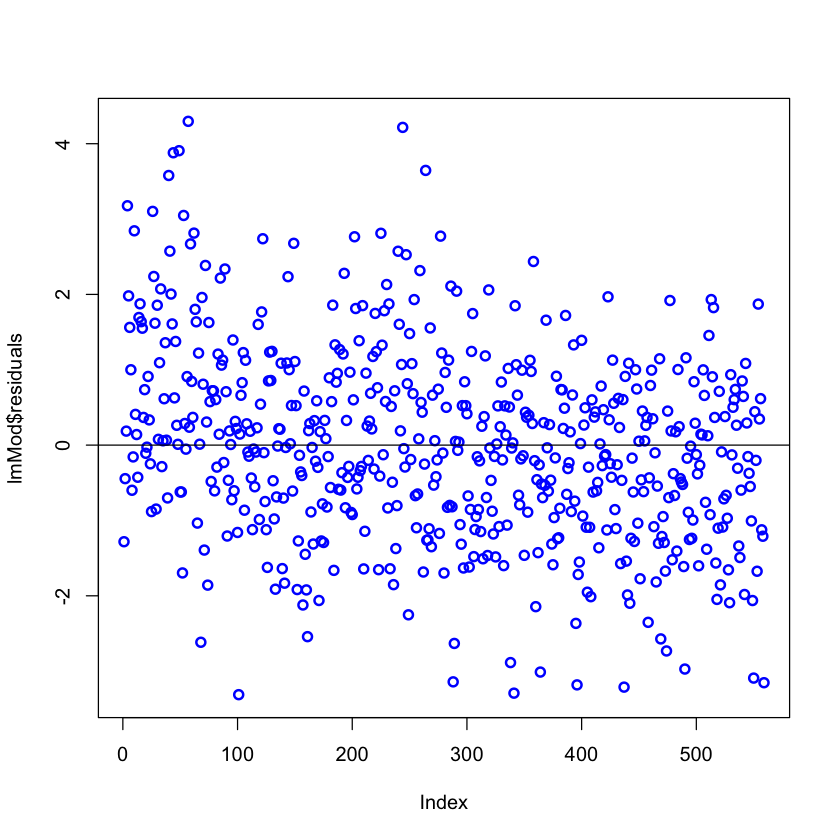

In [101]:
plot(lmMod$residuals, col="blue", lwd=2)
abline(h=0)

Let's now analyze coefficients from the linear model summary data:

In [102]:
summary(lmMod)


Call:
lm(formula = y ~ xx)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3120 -0.8554 -0.0361  0.7530  4.2970 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -7.028e+00  6.254e-02 -112.373  < 2e-16 ***
xx           6.207e+04  7.358e+03    8.436 2.83e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.282 on 557 degrees of freedom
Multiple R-squared:  0.1133,	Adjusted R-squared:  0.1117 
F-statistic: 71.17 on 1 and 557 DF,  p-value: 2.834e-16


coefficient of our independent variable xx (impact probability) tells us that by increasing cumulative impact probability value by 1 would result increase in our dependent variable by 6.207e+04.

standard error is an average amount by which model estimate differs from actual value, ideally it should be a lower number compared to coeffiecient, in which case model is more accurate, which is the case for our linear model. std can be used to calculate a confidence interval of estimates. then we have t-score which is Estimated/Std error and p-value for t-test, which esentially tells us how likely is it that estimates were accurate by chance, meaning that lower pr(>|t|) = more significance.  note that significance *** was assigned to the estimates of our model.

In [103]:
#now lets try multilinear regression with 2 independent variables, with dependent variable this
#time being impact probability

fit <- lm(x$Cumulative.Impact.Probability ~ x$Cumulative.Palermo.Scale + x$Asteroid.Diameter..km.)
summary(fit) # show results


Call:
lm(formula = x$Cumulative.Impact.Probability ~ x$Cumulative.Palermo.Scale + 
    x$Asteroid.Diameter..km.)

Residuals:
       Min         1Q     Median         3Q        Max 
-9.776e-06 -3.749e-06 -1.825e-06  6.140e-07  3.263e-05 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.999e-05  1.552e-06  12.884  < 2e-16 ***
x$Cumulative.Palermo.Scale  2.240e-06  2.205e-07  10.157  < 2e-16 ***
x$Asteroid.Diameter..km.   -1.121e-05  1.845e-06  -6.077 2.28e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.737e-06 on 556 degrees of freedom
Multiple R-squared:  0.1685,	Adjusted R-squared:  0.1655 
F-statistic: 56.34 on 2 and 556 DF,  p-value: < 2.2e-16


# Stage 5 - splitting, fitting, predicting 

In [104]:
#install.packages('caTools')
library(caTools)

#install.packages('ggplot2')
library(ggplot2)

#install.packages('MLmetrics')
library(MLmetrics)

In [105]:
#randomly split dataset into testing and training, create linear model

set.seed(123)
split=sample.split(x$Cumulative.Palermo.Scale, SplitRatio = 0.8)

training_set = subset(x, split == TRUE)
test_set = subset(x, split == FALSE)

regressor = lm(training_set$Cumulative.Palermo.Scale ~ training_set$Maximum.Palermo.Scale)

In [106]:
summary(regressor)


Call:
lm(formula = training_set$Cumulative.Palermo.Scale ~ training_set$Maximum.Palermo.Scale)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.29978 -0.26306 -0.09323  0.14475  1.39301 

Coefficients:
                                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         0.32678    0.08026   4.071 5.53e-05 ***
training_set$Maximum.Palermo.Scale  1.00657    0.01115  90.289  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3063 on 445 degrees of freedom
Multiple R-squared:  0.9482,	Adjusted R-squared:  0.9481 
F-statistic:  8152 on 1 and 445 DF,  p-value: < 2.2e-16


In [107]:
# visualising residuals

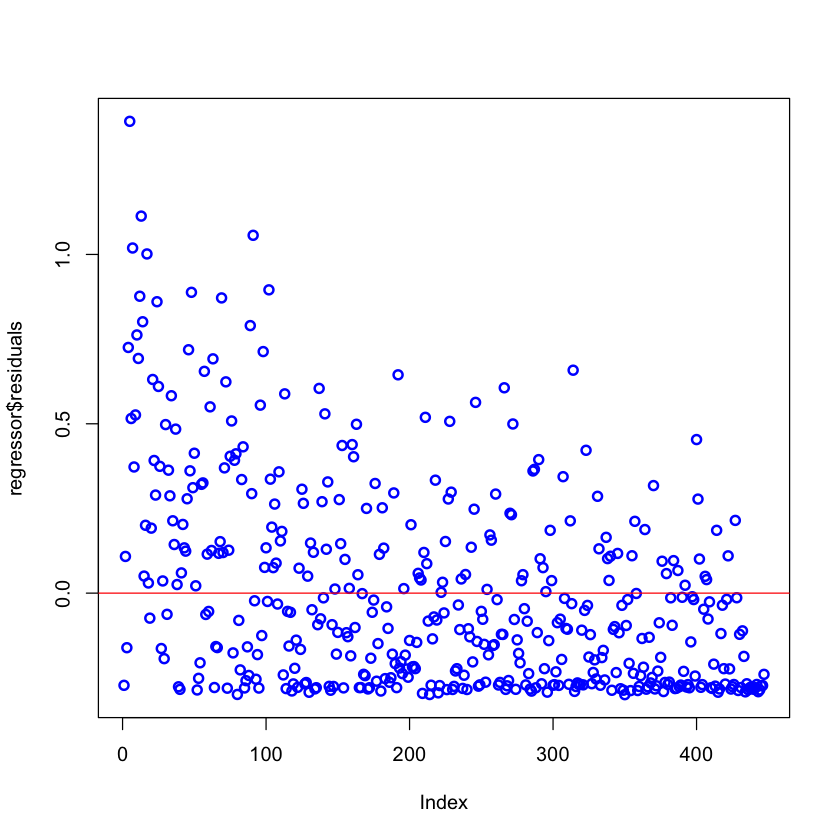

In [108]:
plot(regressor$residuals, col="blue", lwd=2)
abline(h=0, col='red')

Warning message:
“'newdata' had 112 rows but variables found have 447 rows”

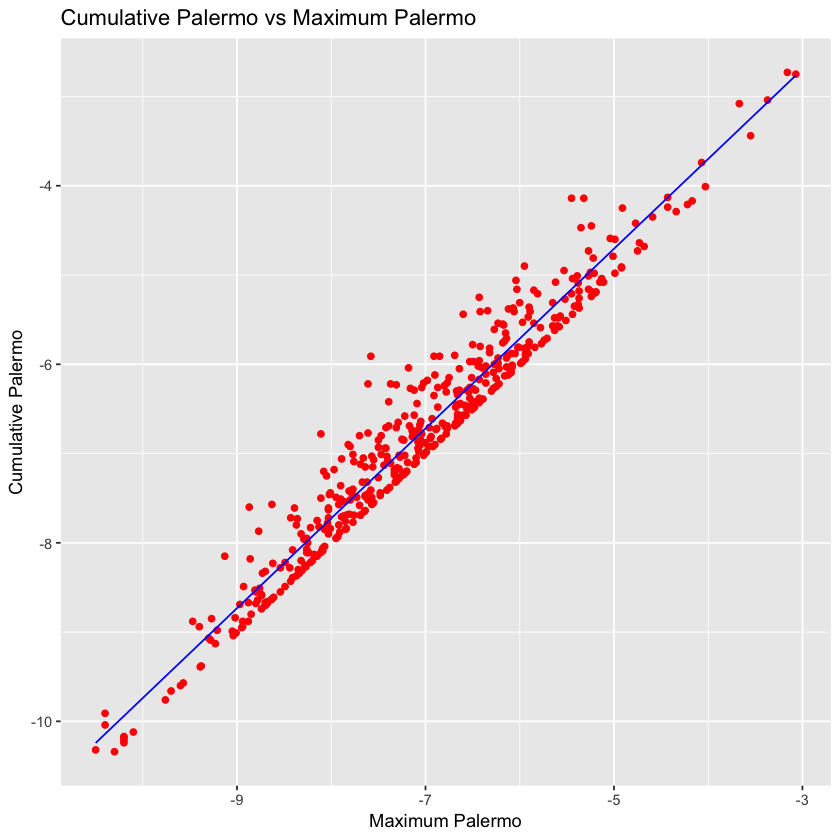

In [109]:
# visualising prediction line mapped to actual results
y_pred = predict(regressor, newdata=test_set)


ggplot() +
  geom_point(aes(x=training_set$Maximum.Palermo.Scale,
                 y=training_set$Cumulative.Palermo.Scale), colour='red')+
  geom_line(aes(x=training_set$Maximum.Palermo.Scale,
                y=predict(regressor, newdata=training_set)), colour='blue') +
  ggtitle('Cumulative Palermo vs Maximum Palermo') +
  xlab('Maximum Palermo') +
  ylab('Cumulative Palermo')

In [110]:
# evaluating model accuracy with different metrics

library(MLmetrics)
print("Root Mean Square Error:")
RMSE(test_set$Cumulative.Palermo.Scale, y_pred)
print("mean absolute percentage error:")
MAPE(test_set$Cumulative.Palermo.Scale, y_pred)
print("mean absolute error:")
MAE(test_set$Cumulative.Palermo.Scale, y_pred)

[1] "Root Mean Square Error:"


Warning message in y_true - y_pred:
“longer object length is not a multiple of shorter object length”

[1] 1.856184

[1] "mean absolute percentage error:"


Warning message in y_true - y_pred:
“longer object length is not a multiple of shorter object length”

[1] 0.2280238

[1] "mean absolute error:"


Warning message in y_true - y_pred:
“longer object length is not a multiple of shorter object length”

[1] 1.466111

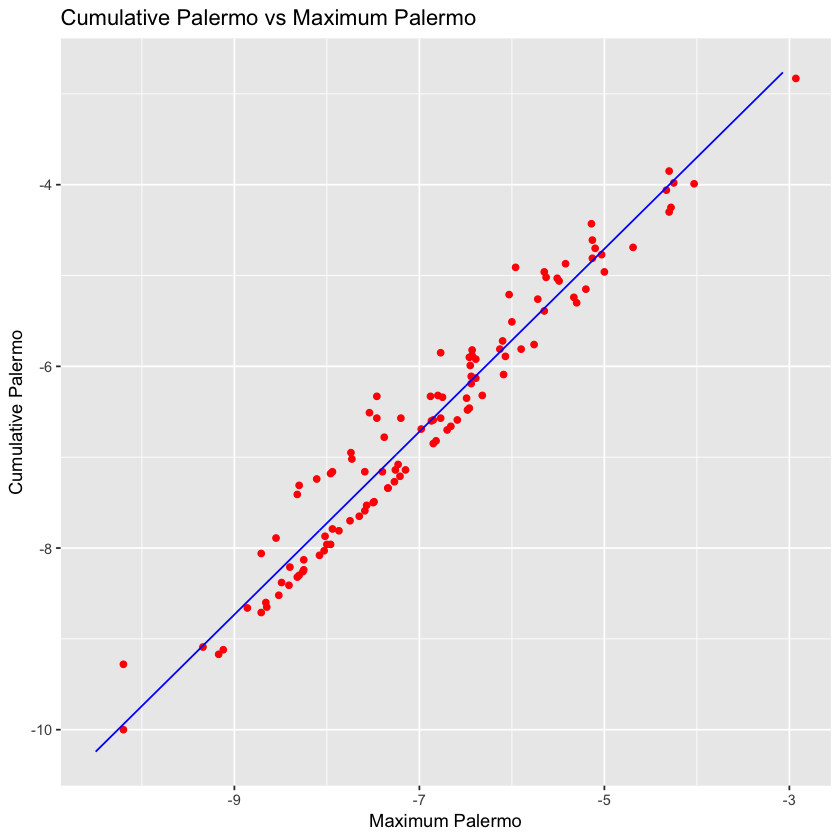

In [111]:
# testing on test set

ggplot() +
  geom_point(aes(x=test_set$Maximum.Palermo.Scale,
                 y=test_set$Cumulative.Palermo.Scale), colour='red')+
  geom_line(aes(x=training_set$Maximum.Palermo.Scale,
                y=predict(regressor, newdata=training_set)), colour='blue') +
  ggtitle('Cumulative Palermo vs Maximum Palermo') +
  xlab('Maximum Palermo') +
  ylab('Cumulative Palermo')

In [112]:
# multilinear

regressor = lm(formula = Cumulative.Palermo.Scale ~ ., data=training_set)
summary(regressor)


Call:
lm(formula = Cumulative.Palermo.Scale ~ ., data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49961 -0.18528 -0.05556  0.15841  0.85867 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    4.959e-01  1.756e-01   2.825 0.004949 ** 
Possible.Impacts               1.434e-03  1.008e-04  14.222  < 2e-16 ***
Cumulative.Impact.Probability  6.861e+03  2.054e+03   3.340 0.000908 ***
Asteroid.Velocity             -6.049e-03  2.153e-03  -2.810 0.005170 ** 
Asteroid.Magnitude            -1.611e-02  7.709e-03  -2.090 0.037160 *  
Asteroid.Diameter..km.         2.130e-02  8.531e-02   0.250 0.802988    
Maximum.Palermo.Scale          9.734e-01  1.296e-02  75.104  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2468 on 440 degrees of freedom
Multiple R-squared:  0.9668,	Adjusted R-squared:  0.9663 
F-statistic:  2133 on 6 and 440 DF,  p-val

based on p-values of our multivariable regression model summary it is obvious that only the half of the features is statistically significant for making predictions, thus by removing insignificant features model can be simplified to be: 

In [113]:
regressor = lm(formula = Cumulative.Palermo.Scale ~ Possible.Impacts + 
                 Asteroid.Velocity + Maximum.Palermo.Scale, data=training_set)
summary(regressor)

# different model evaluation metrics:

print("Root Mean Square Error:")
RMSE(predict(regressor, newdata=test_set), test_set$Cumulative.Palermo.Scale)
print("mean absolute percentage error:")
MAPE(predict(regressor, newdata=test_set), test_set$Cumulative.Palermo.Scale)
print("mean absolute error:")
MAE(predict(regressor, newdata=test_set), test_set$Cumulative.Palermo.Scale)


Call:
lm(formula = Cumulative.Palermo.Scale ~ Possible.Impacts + Asteroid.Velocity + 
    Maximum.Palermo.Scale, data = training_set)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.50448 -0.19059 -0.06163  0.14605  0.87000 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.3372174  0.0781134   4.317 1.95e-05 ***
Possible.Impacts       0.0014296  0.0001018  14.050  < 2e-16 ***
Asteroid.Velocity     -0.0074941  0.0020602  -3.638 0.000308 ***
Maximum.Palermo.Scale  1.0034062  0.0094075 106.660  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2494 on 443 degrees of freedom
Multiple R-squared:  0.9658,	Adjusted R-squared:  0.9656 
F-statistic:  4174 on 3 and 443 DF,  p-value: < 2.2e-16


[1] "Root Mean Square Error:"


[1] 0.2500165

[1] "mean absolute percentage error:"


[1] 0.0329163

[1] "mean absolute error:"


[1] 0.2109855

In [114]:
# SVR regression

# install.packages('e1071')
# library(e1071)

regressor = svm(formula = Cumulative.Palermo.Scale ~ Maximum.Palermo.Scale, data=x,
               type = 'eps-regression')

In [115]:
# summary and different model evaluation metrics:

summary(regressor)

print("Root Mean Square Error:")
RMSE(predict(regressor, newdata=x), x$Cumulative.Palermo.Scale)
print("mean absolute percentage error:")
MAPE(predict(regressor, newdata=x), x$Cumulative.Palermo.Scale)
print("mean absolute error:")
MAE(predict(regressor, newdata=x), x$Cumulative.Palermo.Scale)



Call:
svm(formula = Cumulative.Palermo.Scale ~ Maximum.Palermo.Scale, data = x, 
    type = "eps-regression")


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  radial 
       cost:  1 
      gamma:  1 
    epsilon:  0.1 


Number of Support Vectors:  382






[1] "Root Mean Square Error:"


[1] 0.3106001

[1] "mean absolute percentage error:"


[1] 0.03699718

[1] "mean absolute error:"


[1] 0.2335717

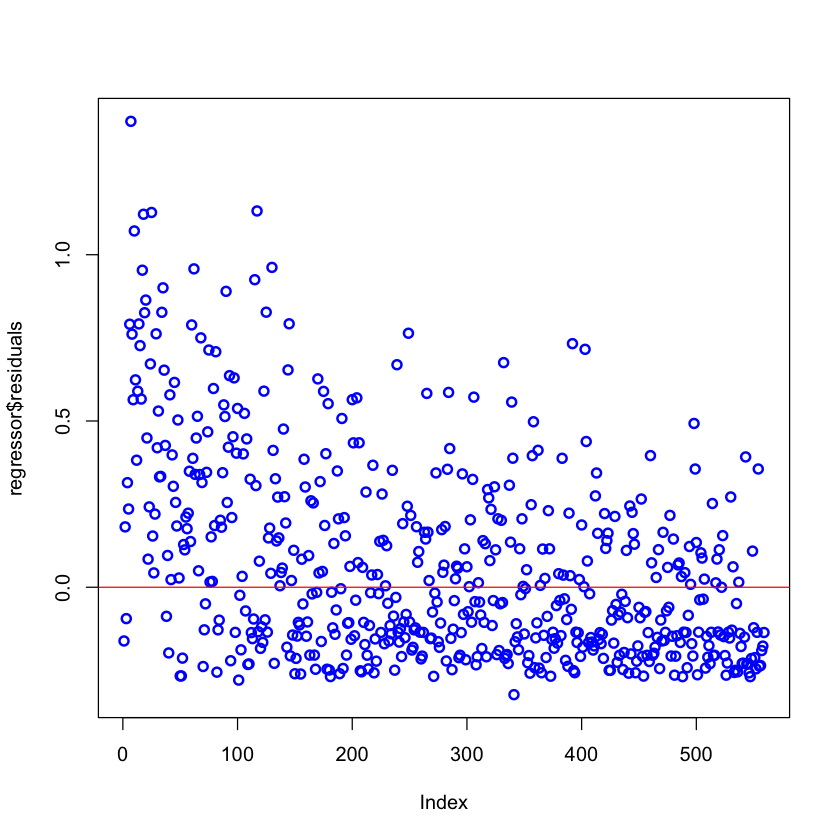

In [116]:
# residual visualisation

plot(regressor$residuals, col="blue", lwd=2)
abline(h=0, col='red')

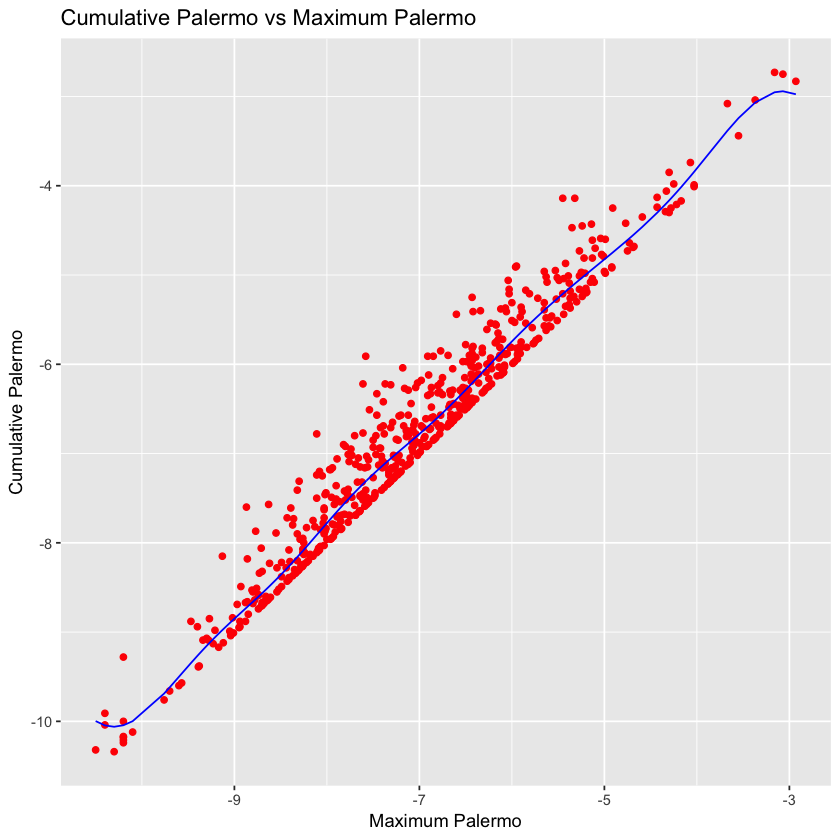

In [117]:
# visualising accuracy

ggplot() +
  geom_point(aes(x=x$Maximum.Palermo.Scale,
                 y=x$Cumulative.Palermo.Scale), colour='red')+
  geom_line(aes(x=x$Maximum.Palermo.Scale,
                y=predict(regressor, newdata=x)), colour='blue') +
  ggtitle('Cumulative Palermo vs Maximum Palermo') +
  xlab('Maximum Palermo') +
  ylab('Cumulative Palermo')

summary and comparison of different models

according to metrics used to evaluate the models, simplified multilinear model (with three independent variables) seems to be most accurate: it’s adjusted R^2 value was 0.967, with residual standard error being 0.252, RMSE=0.24, MAPE=0.032 and MAE=0.20

multivariable support vector machine model was a close second, which is surprising, since residual and prediction-actual value plots suggested far superior prediction accuracy, but it proved to be deceiving since metrics show it’s root mean square error was 0.31, MAPE = 0.038 and MAE = 0.23, all this achieved by employing 449 support vectors, radial kernel with cost and gamma set to 1 and epsilon set to 0.1

The least accurate, as expected, was simple linear model, with adjusted R^2 value of 0.95, RMSE = 2.02, MAPE = 0.28, MAE = 1.64, however it’s p-value of 2.2 * 10^-16 suggests that it’s accuracy is still highly statistically significant.